# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [1]:
import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [2]:
from python_environment_check import check_packages


d = {
    'numpy': '1.21.2',
    'scipy': '1.7.0',
    'sklearn': '1.0.0',
    'matplotlib': '3.4.3',
    'torch': '1.9.0',
}
check_packages(d)

[OK] Your Python version is 3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)]
[OK] numpy 1.26.4
[OK] scipy 1.14.1
[OK] sklearn 1.5.1
[OK] matplotlib 3.9.2
[OK] torch 2.3.0+cu121


# Chapter 12: Parallelizing Neural Network Training with PyTorch  (Part 2/2)


- [Building an NN model in PyTorch](#Building-an-NN-model-in-PyTorch)
  - [The PyTorch neural network module (torch.nn)](#The-PyTorch-neural-network-module-(torch.nn))
  - [Building a linear regression model](#Building-a-linear-regression-model)
  - [Model training via the torch.nn and torch.optim modules](#Model-training-via-the-torch.nn-and-torch.optim-modules)
  - [Building a multilayer perceptron for classifying flowers in the Iris dataset](#Building-a-multilayer-perceptron-for-classifying-flowers-in-the-Iris-dataset)
  - [Evaluating the trained model on the test dataset](#Evaluating-the-trained-model-on-the-test-dataset)
  - [Saving and reloading the trained model](#Saving-and-reloading-the-trained-model)
- [Choosing activation functions for multilayer neural
networks](#Choosing-activation-functions-for-multilayer-neural-networks)
  - [Logistic function recap](#Logistic-function-recap)
  - [Estimating class probabilities in multiclass classification via the softmax function](#Estimating-class-probabilities-in-multiclass-classification-via-the-softmax-function)
  - [Broadening the output spectrum using a hyperbolic tangent](#Broadening-the-output-spectrum-using-a-hyperbolic-tangent)
  - [Rectified linear unit activation](#Rectified-linear-unit-activation)
- [Summary](#Summary)

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [3]:
from IPython.display import Image as IPythonImage
%matplotlib inline

## Building a neural network model in PyTorch

### The PyTorch neural network module (torch.nn)

### Building a linear regression model

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

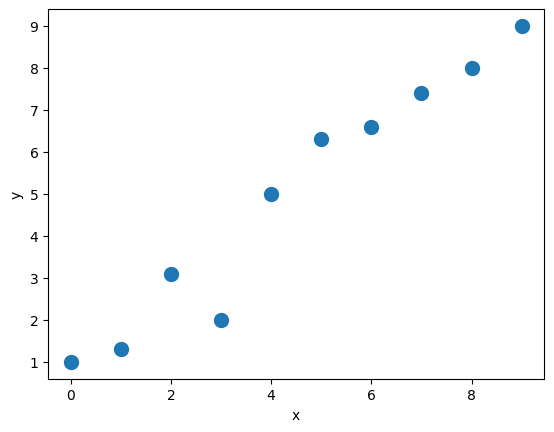

In [5]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('figures/12_07.pdf')
plt.show()

In [6]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

# On some computers the explicit cast to .float() is
# necessary
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)
for feature, label in train_ds:
    print("feaure =", feature, "    label =", label)

print("_"*40)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
for i, (feature, label) in enumerate(train_dl):
    print(f"batch {i+1}:")
    print("    feaure =\n", feature, "    label =", label)

feaure = tensor([-1.5667])     label = tensor(1.)
feaure = tensor([-1.2185])     label = tensor(1.3000)
feaure = tensor([-0.8704])     label = tensor(3.1000)
feaure = tensor([-0.5222])     label = tensor(2.)
feaure = tensor([-0.1741])     label = tensor(5.)
feaure = tensor([0.1741])     label = tensor(6.3000)
feaure = tensor([0.5222])     label = tensor(6.6000)
feaure = tensor([0.8704])     label = tensor(7.4000)
feaure = tensor([1.2185])     label = tensor(8.)
feaure = tensor([1.5667])     label = tensor(9.)
________________________________________
batch 1:
    feaure =
 tensor([[-1.2185],
        [-0.8704]])     label = tensor([1.3000, 3.1000])
batch 2:
    feaure =
 tensor([[ 1.5667],
        [-0.5222]])     label = tensor([9., 2.])
batch 3:
    feaure =
 tensor([[-0.1741],
        [ 1.2185]])     label = tensor([5., 8.])
batch 4:
    feaure =
 tensor([[ 0.8704],
        [-1.5667]])     label = tensor([7.4000, 1.0000])
batch 5:
    feaure =
 tensor([[0.1741],
        [0.5222]])     

Because the batch size is $2$, we have 5 different batches. And notice after shuffling, (feature, label) pairs are preserved.

In [7]:
torch.manual_seed(1)

# Weight terms (all scalar for this example, because feature x is a scalar)
weight = torch.randn(1, requires_grad=True)  # requires_grad=True means the gradient of Loss w.r.t. this tensor will be tracked through the network.
bias = torch.zeros(1, requires_grad=True)  # requires_grad=True means the gradient of Loss w.r.t. this tensor will be tracked through the network.

# Loss function
def loss_fn(input, target):
    return (input - target).pow(2).mean()  # Mean squared error

# Our model to generate yhat values
def model(xb):
    return xb @ weight + bias

learning_rate = 0.001
num_epochs = 200
log_epochs = 10
 

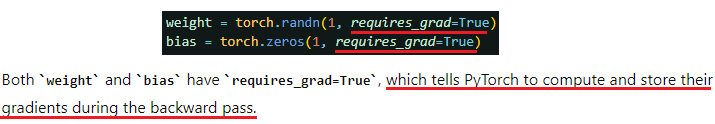

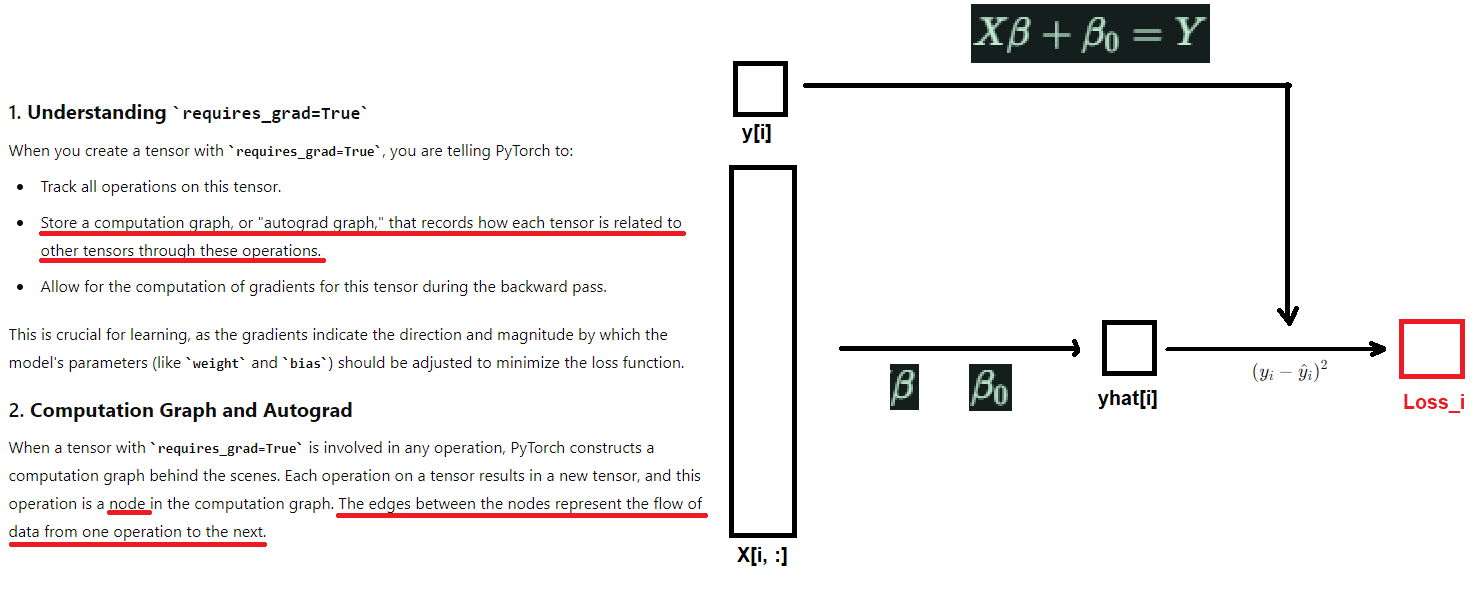

In [8]:
for epoch in range(num_epochs):
    # Because batch size is 2, this is a mini-batch stochastic gradient descent algorithm. (Looping over each 2 data points separately)
    for x_batch, y_batch in train_dl:  # train_dl is a torch.DataLoader class initiated above
        pred = model(x_batch)  # yhat, prediction vector of our model, here it has shape (2,) because batch size is 2.
        loss = loss_fn(pred, y_batch)  # loss, MSE of the model (scalar) 
        loss.backward()  # starts the backpropagation process such that 

        with torch.no_grad():
            weight -= weight.grad * learning_rate  # gradient descent update
            bias -= bias.grad * learning_rate  # gradient descent update
            weight.grad.zero_()  # reset the gradient, because we are manually looping.
            bias.grad.zero_()  # reset the gradient, because we are manually looping.
 
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 54.4459
Epoch 10  Loss 26.6861
Epoch 20  Loss 14.7747
Epoch 30  Loss 21.1890
Epoch 40  Loss 14.6957
Epoch 50  Loss 19.7220
Epoch 60  Loss 1.2443
Epoch 70  Loss 13.1094
Epoch 80  Loss 8.4891
Epoch 90  Loss 4.3804
Epoch 100  Loss 3.9785
Epoch 110  Loss 5.4690
Epoch 120  Loss 0.1450
Epoch 130  Loss 2.4366
Epoch 140  Loss 3.9358
Epoch 150  Loss 1.1941
Epoch 160  Loss 1.7712
Epoch 170  Loss 1.0116
Epoch 180  Loss 1.2025
Epoch 190  Loss 0.9808


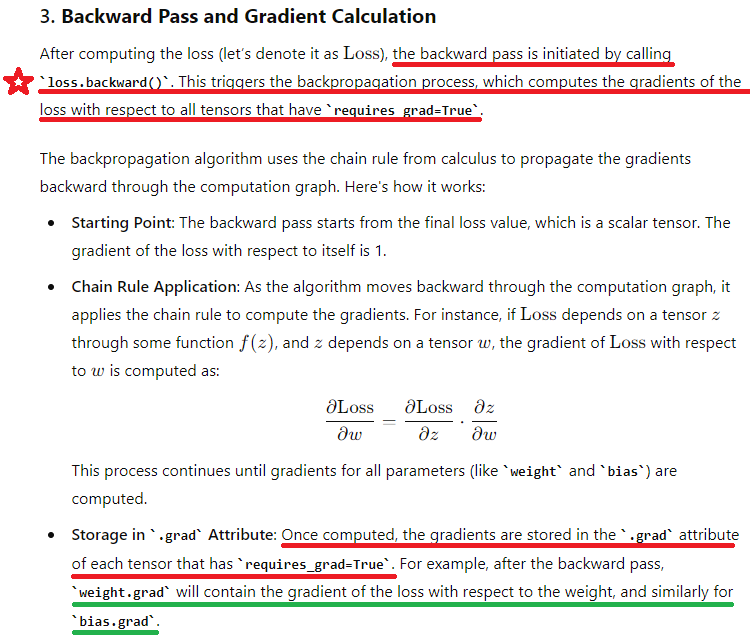

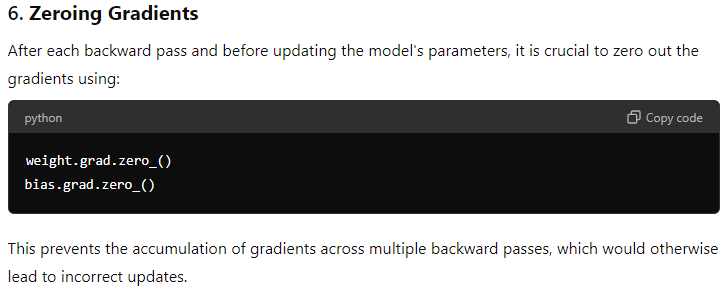

Final Parameters: 2.4309542179107666 4.2993645668029785


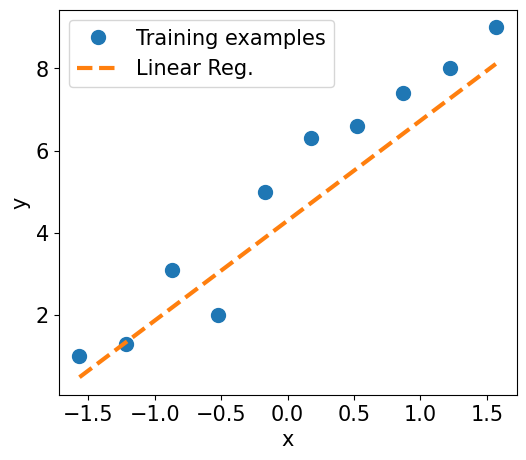

In [9]:
print('Final Parameters:', weight.item(), bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 
#plt.savefig('figures/12_08.pdf')

plt.show()

### My try:

In [10]:
np.set_printoptions(precision=3, suppress=True)

n = 1000
k = n//2
full_X = np.random.normal(20, 5, (n, 3))  # X is a (200, 3) shape array, 200 observations, 3 dimensions
X = full_X[:k]
X = (X - X.mean(axis=0)) / X.std(axis=0)
X_test = full_X[k:]
d = X.shape[1]
X[:5, :]  # first few rows of X

array([[ 1.89 , -0.295, -0.793],
       [ 0.388, -0.729, -1.823],
       [ 0.798, -0.17 , -0.88 ],
       [-2.9  ,  1.292, -0.176],
       [ 0.602,  0.028,  1.417]])

In [11]:
true_params = [np.array([2, 1, 3]), 10]  # true parameters to generate Y, where beta = (2, 1, 3), beta0 = 10
full_Y = full_X @ true_params[0] + true_params[1] + np.random.standard_normal(n)  # Generate Y with additional gaussian noise ~N(0, 9)
Y = full_Y[:k]

# mean and std of the train Y labels
Y_train_mean = Y.mean()
Y_train_std = Y.std()
print("Y_train_std =", Y_train_std)
Y = (Y - Y_train_mean) / Y_train_std  # normalize labels as well.

Y_test = full_Y[k:]
Y_test_normalized = (Y_test - Y_test.mean()) / Y_test.std()
Y[:5]  # first few rows of Y

Y_train_std = 18.188850753723166


array([ 0.396, -1.394, -0.332, -1.385,  1.414])

In [12]:
# Initialize TensorDataset object to be used in a DataLoader object later
from itertools import islice
XY_ds = TensorDataset(torch.from_numpy(X).float(), torch.from_numpy(Y).float())
for x, y in islice(XY_ds, 5):  # First 5 (feature, label) pairs
    print("x =\n", x, "    y =", y)

x =
 tensor([ 1.8897, -0.2951, -0.7930])     y = tensor(0.3956)
x =
 tensor([ 0.3880, -0.7290, -1.8227])     y = tensor(-1.3938)
x =
 tensor([ 0.7983, -0.1701, -0.8803])     y = tensor(-0.3319)
x =
 tensor([-2.8998,  1.2917, -0.1757])     y = tensor(-1.3852)
x =
 tensor([0.6017, 0.0276, 1.4166])     y = tensor(1.4144)


In [13]:
# Initialize DataLoader objcet
from torch.utils.data.dataloader import DataLoader
XY_dl = DataLoader(XY_ds, batch_size=5, shuffle=True)
for i, (feature, label) in enumerate(XY_dl):
    print("_"*40)
    print(f"batch {i+1}:")
    print("feature tensor:\n", feature, "    label =", label)

________________________________________
batch 1:
feature tensor:
 tensor([[-0.0758, -0.5583, -0.6363],
        [-1.3943,  1.8079,  1.2480],
        [-0.9035,  0.5871, -0.0710],
        [ 0.6538,  0.3422,  1.5137],
        [-0.6913,  0.1936, -1.8625]])     label = tensor([-0.7295,  0.6436, -0.4073,  1.6746, -1.9263])
________________________________________
batch 2:
feature tensor:
 tensor([[-0.4428, -2.0050,  0.4638],
        [-0.6620,  1.1069,  0.8794],
        [-0.1588, -0.6897, -0.9360],
        [-0.5079,  1.5278,  1.6578],
        [ 0.9130,  0.7154, -0.8039]])     label = tensor([-0.5171,  0.6206, -1.0528,  1.4055, -0.0025])
________________________________________
batch 3:
feature tensor:
 tensor([[ 1.8005,  1.0314, -2.0544],
        [-1.4725, -0.0650,  0.4936],
        [ 0.9239,  0.9972,  1.4967],
        [-0.2193,  0.9853, -1.4265],
        [ 0.2559, -2.2229, -1.3121]])     label = tensor([-0.4586, -0.4245,  1.9007, -0.9113, -1.4769])
________________________________________
ba

Epoch 0 loss = tensor(9.9570, grad_fn=<MeanBackward0>)
Epoch 50 loss = tensor(1.1603, grad_fn=<MeanBackward0>)
Epoch 100 loss = tensor(0.1058, grad_fn=<MeanBackward0>)
Epoch 150 loss = tensor(0.0184, grad_fn=<MeanBackward0>)
Epoch 200 loss = tensor(0.0045, grad_fn=<MeanBackward0>)
Epoch 250 loss = tensor(0.0038, grad_fn=<MeanBackward0>)
Epoch 300 loss = tensor(0.0104, grad_fn=<MeanBackward0>)
Epoch 350 loss = tensor(0.0008, grad_fn=<MeanBackward0>)
Epoch 400 loss = tensor(0.0032, grad_fn=<MeanBackward0>)
Epoch 450 loss = tensor(0.0048, grad_fn=<MeanBackward0>)
Epoch 500 loss = tensor(0.0023, grad_fn=<MeanBackward0>)
Epoch 550 loss = tensor(0.0006, grad_fn=<MeanBackward0>)
Epoch 600 loss = tensor(0.0049, grad_fn=<MeanBackward0>)
Epoch 650 loss = tensor(0.0015, grad_fn=<MeanBackward0>)
Epoch 700 loss = tensor(0.0021, grad_fn=<MeanBackward0>)
Epoch 750 loss = tensor(0.0011, grad_fn=<MeanBackward0>)
Epoch 800 loss = tensor(0.0039, grad_fn=<MeanBackward0>)
Epoch 850 loss = tensor(0.0031, gr

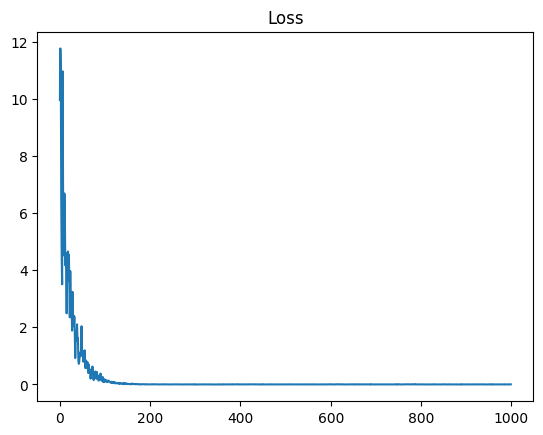

In [14]:
num_epochs = 1000  # run 1000 epochs
eta = 1e-4  # learning rate

# Initialize random weights with requires_grad=True
beta = torch.randn(d, requires_grad=True)
beta0 = torch.randn(1, requires_grad=True)

def model_linreg(x):
    yhat = x @ beta + beta0
    return yhat

def lossfunc(y, yhat):
    """Calculates the MSE for the batch.

    Args:
        y (torch.Tensor): shape (batch_size,) rank 1 tensor, true labels
        yhat (torch.Tensor): shape (batch_size,) rank 1 tensor, predicted labels
    """
    return ((yhat - y)**2).mean()

loss_arr = []
for epoch in range(num_epochs):
    for x_batch, y_batch in XY_dl:
        # print("beta =", beta)
        # print("beta0 =", beta0)
        yhat = model_linreg(x_batch)
        loss = lossfunc(y_batch, yhat)
        loss.backward()
        # print("beta.grad =", beta.grad)
        # print("beta0.grad =", beta0.grad)
        
        with torch.no_grad():
            beta -= eta*beta.grad
            beta0 -= eta*beta0.grad
            beta.grad.zero_()
            beta0.grad.zero_()
    
    if epoch % 50 == 0:
        print(f"Epoch {epoch} loss =", loss)
    loss_arr.append(loss.detach().numpy())

plt.plot(loss_arr)
plt.title("Loss")

print("Final predictions:")
print("beta =", beta)
print("beta0 =", beta0)
print("beta dtype =", beta.dtype)
print("beta0 dtype =", beta0.dtype)

Now let's check the final weights against the test data

MSE on the normalized test dataset = tensor(0.0032, dtype=torch.float64)
MSE on the de-normalized test dataset = tensor(4.3952, dtype=torch.float64)
yhat_test - y_test =
 tensor([ 1.3554e+00,  2.3694e+00,  2.3096e+00,  1.7532e+00,  3.4477e+00,
         1.9437e+00,  4.3476e-01,  9.8017e-01, -3.1154e-01, -8.4418e-02,
         2.2255e+00,  2.2638e+00,  1.2208e+00,  1.7305e+00,  2.2138e+00,
         4.7705e-01,  1.4541e+00,  1.8748e+00,  2.7191e+00,  2.7269e+00,
         1.5739e+00,  7.9581e-01,  3.0428e+00,  5.4538e-01, -1.9364e-01,
         1.9940e+00,  1.2219e+00,  2.9359e+00,  2.1032e+00,  1.1963e+00,
         1.9569e+00,  2.1795e+00,  3.0269e+00,  2.8205e+00,  3.2120e+00,
         1.3337e+00,  1.9148e+00,  2.9486e+00,  1.6773e+00,  1.3160e+00,
         1.4788e+00,  3.2444e+00,  1.7680e+00,  9.0744e-01,  3.4385e+00,
         1.6447e+00,  1.2123e+00,  2.5497e+00,  1.4356e+00,  8.9994e-01,
         2.7270e+00,  1.0295e+00,  9.3938e-01,  1.8436e+00,  1.6022e+00,
         1.8012e+00,  1.18

<>:18: SyntaxWarning: invalid escape sequence '\h'
<>:18: SyntaxWarning: invalid escape sequence '\h'
C:\Users\adevr\AppData\Local\Temp\ipykernel_3732\2198609431.py:18: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("Residuals $\hat{y} - y$")


Text(0, 0.5, 'Residuals $\\hat{y} - y$')

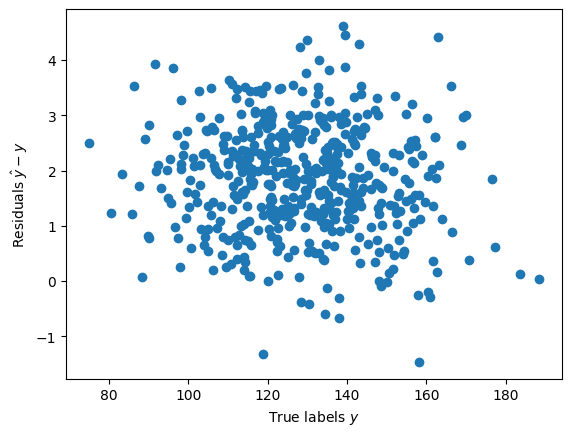

In [15]:
X_test_normalized = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)
X_test_normalized = torch.from_numpy(X_test_normalized).to(torch.float32)  # convert from np.array to torch.Tensor object
yhat_test_normalized = model_linreg(X_test_normalized)  # we get normalized labels
yhat_test = yhat_test_normalized * Y_train_std + Y_train_mean  # we de-normalize the predicted labels

# Calculate normalized loss
loss_test_normalized = lossfunc(Y_test_normalized, yhat_test_normalized.detach())
print("MSE on the normalized test dataset =", loss_test_normalized)

# Calculate de-normalized loss
loss_test_denormalized = lossfunc(Y_test, yhat_test.detach())
print("MSE on the de-normalized test dataset =", loss_test_denormalized)

test_y_diff = yhat_test.detach() - Y_test
print("yhat_test - y_test =\n", test_y_diff)
plt.scatter(Y_test, test_y_diff)
plt.xlabel("True labels $y$")
plt.ylabel("Residuals $\hat{y} - y$")

### Model training via the torch.nn and torch.optim modules

### *Single Layer Linear NN architecture*

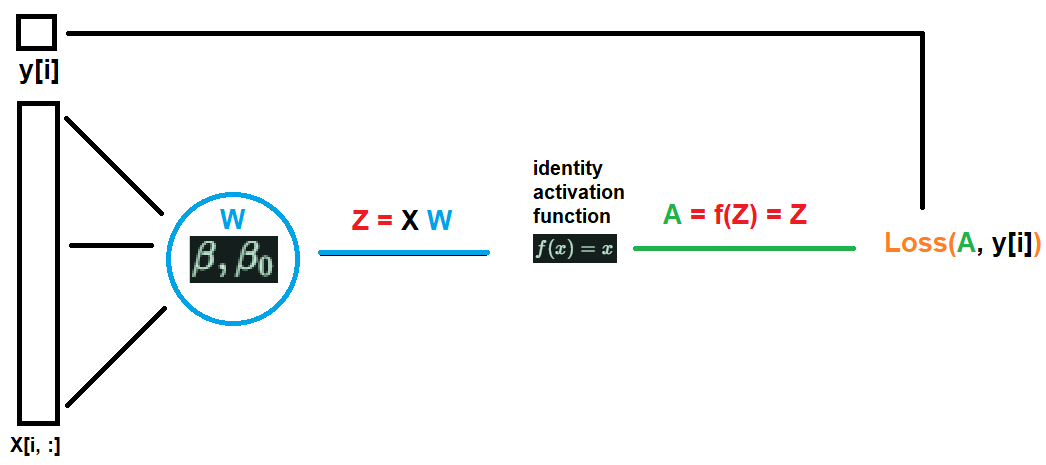

In [16]:
import torch.nn as nn

# Decide the number of input and output neurons in the layer
input_size = 1  # The layer has just 1 neuron (a.k.a. 1 weight) to process the feature vector.
output_size = 1  # The layer outputs just 1 vector.
model = nn.Linear(input_size, output_size)  # This is just a single linear layer.

# Choose loss function (e.g. Mean Squared Error, Hinge Loss etc.)
loss_fn = nn.MSELoss(reduction='mean')

# Choose optimizer (e.g. Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

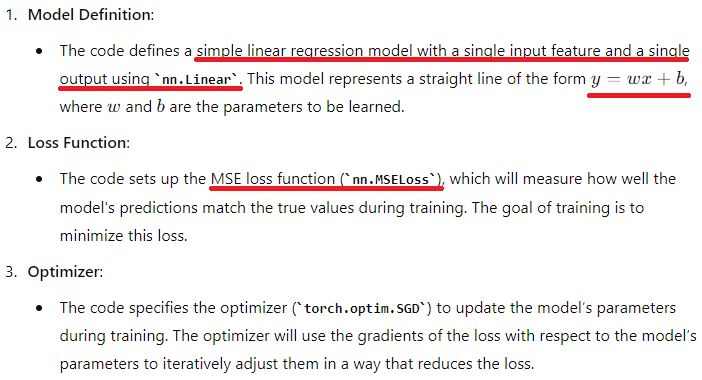

In [17]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)[:, 0] 

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()  # one step forward via SGD

        # 5. Reset the gradients to zero
        optimizer.zero_grad()
        
    if epoch % 50==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 67.6292
Epoch 50  Loss 24.4422
Epoch 100  Loss 4.7515
Epoch 150  Loss 1.5730
Epoch 200  Loss 0.5351
Epoch 250  Loss 0.5111
Epoch 300  Loss 0.0663
Epoch 350  Loss 0.0515
Epoch 400  Loss 0.1044
Epoch 450  Loss 1.2026
Epoch 500  Loss 1.2082
Epoch 550  Loss 1.1926
Epoch 600  Loss 1.2668
Epoch 650  Loss 0.0413
Epoch 700  Loss 0.1486
Epoch 750  Loss 0.1572
Epoch 800  Loss 1.5809
Epoch 850  Loss 0.1409
Epoch 900  Loss 0.1051
Epoch 950  Loss 1.2501


Final Parameters: 2.7067410945892334 4.969690322875977
X_test_norm type: <class 'torch.Tensor'>


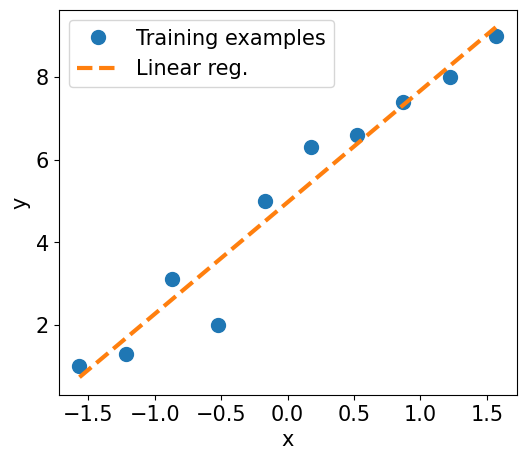

In [18]:
print('Final Parameters:', model.weight.item(), model.bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm.detach().numpy(), y_train.detach().numpy(), 'o', markersize=10)
print("X_test_norm type:", type(X_test_norm))
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 
#plt.savefig('ch12-linreg-2.pdf')

plt.show()


## Building a multilayer perceptron for classifying flowers in the Iris dataset

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)

print("X_train type:", type(X_train))
print("X_train[:5] =", X_train[:5])
print("y_train type:", type(y_train))
print("y_train[:5] =", y_train[:5])

X_train type: <class 'numpy.ndarray'>
X_train[:5] = [[5.1 3.4 1.5 0.2]
 [5.5 3.5 1.3 0.2]
 [7.7 3.8 6.7 2.2]
 [6.9 3.1 5.4 2.1]
 [7.3 2.9 6.3 1.8]]
y_train type: <class 'numpy.ndarray'>
y_train[:5] = [0 0 2 2 2]


In [20]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

# Standardize datasets and convert to torch.Tensor objects
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)  # labels does NOT need standardization as they are (integer) CLASS labels.

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [21]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  
        self.layer2 = nn.Linear(hidden_size, output_size)  

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [22]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

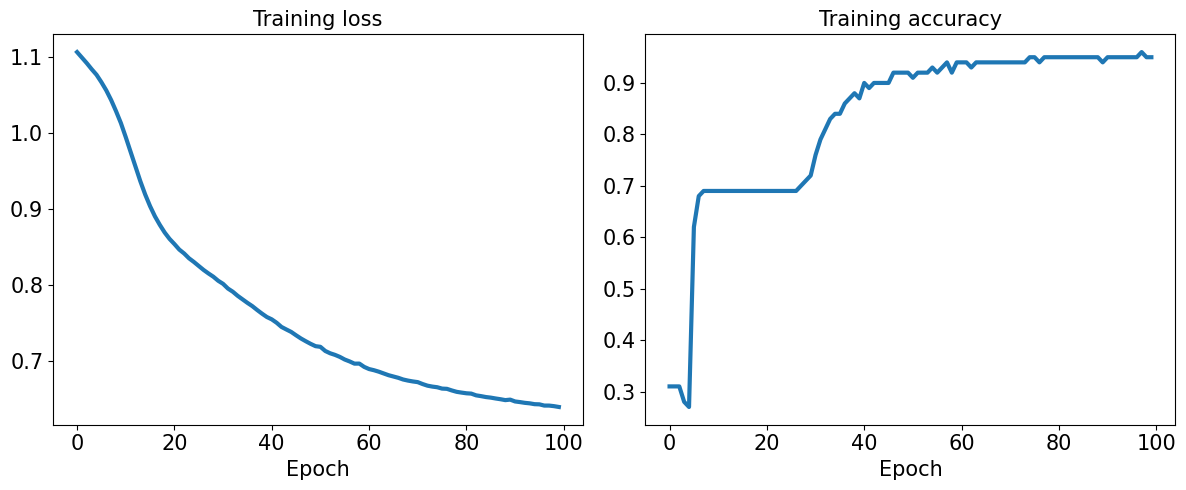

In [23]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#plt.savefig('figures/12_09.pdf')
 
plt.show()

### Evaluating the trained model on the test dataset

In [24]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')


Test Acc.: 0.9800


### Saving and reloading the trained model

In [25]:
path = 'iris_classifier.pt'
torch.save(model, path)

In [26]:
model_new = torch.load(path)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [27]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [28]:
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

In [29]:
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))


<All keys matched successfully>

## Choosing activation functions for multilayer neural networks


### Logistic function recap

In [30]:
import numpy as np

X = np.array([1, 1.4, 2.5]) ## first value must be 1
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print(f'P(y=1|x) = {logistic_activation(X, w):.3f}') 

P(y=1|x) = 0.888


In [31]:
# W : array with shape = (n_output_units, n_hidden_units+1)
# note that the first column are the bias units

W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A : data array with shape = (n_hidden_units + 1, n_samples)
# note that the first column of this array must be 1

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net Input: \n', Z)

print('Output Units:\n', y_probas) 

Net Input: 
 [1.78 0.76 1.65]
Output Units:
 [0.856 0.681 0.839]


In [32]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label:', y_class) 

Predicted class label: 0


### Estimating class probabilities in multiclass classification via the softmax function

In [33]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

np.sum(y_probas)

Probabilities:
 [0.447 0.161 0.392]


1.0

In [34]:
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

### Broadening the output spectrum using a hyperbolic tangent

<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
C:\Users\adevr\AppData\Local\Temp\ipykernel_3732\2356807978.py:14: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('Activation $\phi(z)$')


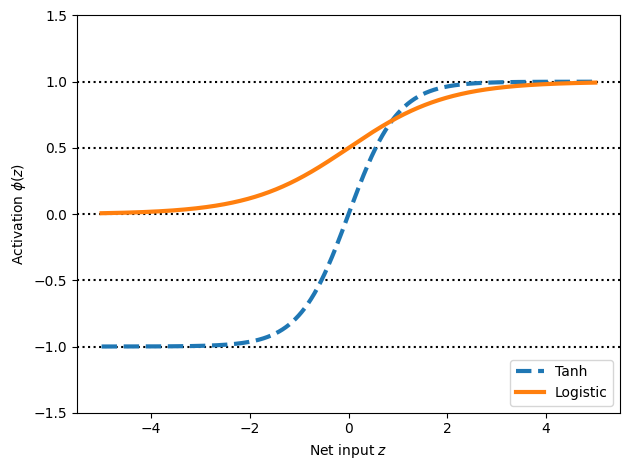

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()

#plt.savefig('figures/12_10.pdf')
plt.show()

In [36]:
np.tanh(z)

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [37]:
torch.tanh(torch.from_numpy(z))
 

tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)

In [38]:
from scipy.special import expit

expit(z)

array([0.007, 0.007, 0.007, ..., 0.993, 0.993, 0.993])

In [39]:
torch.sigmoid(torch.from_numpy(z))

tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)

### Rectified linear unit activation

In [40]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)

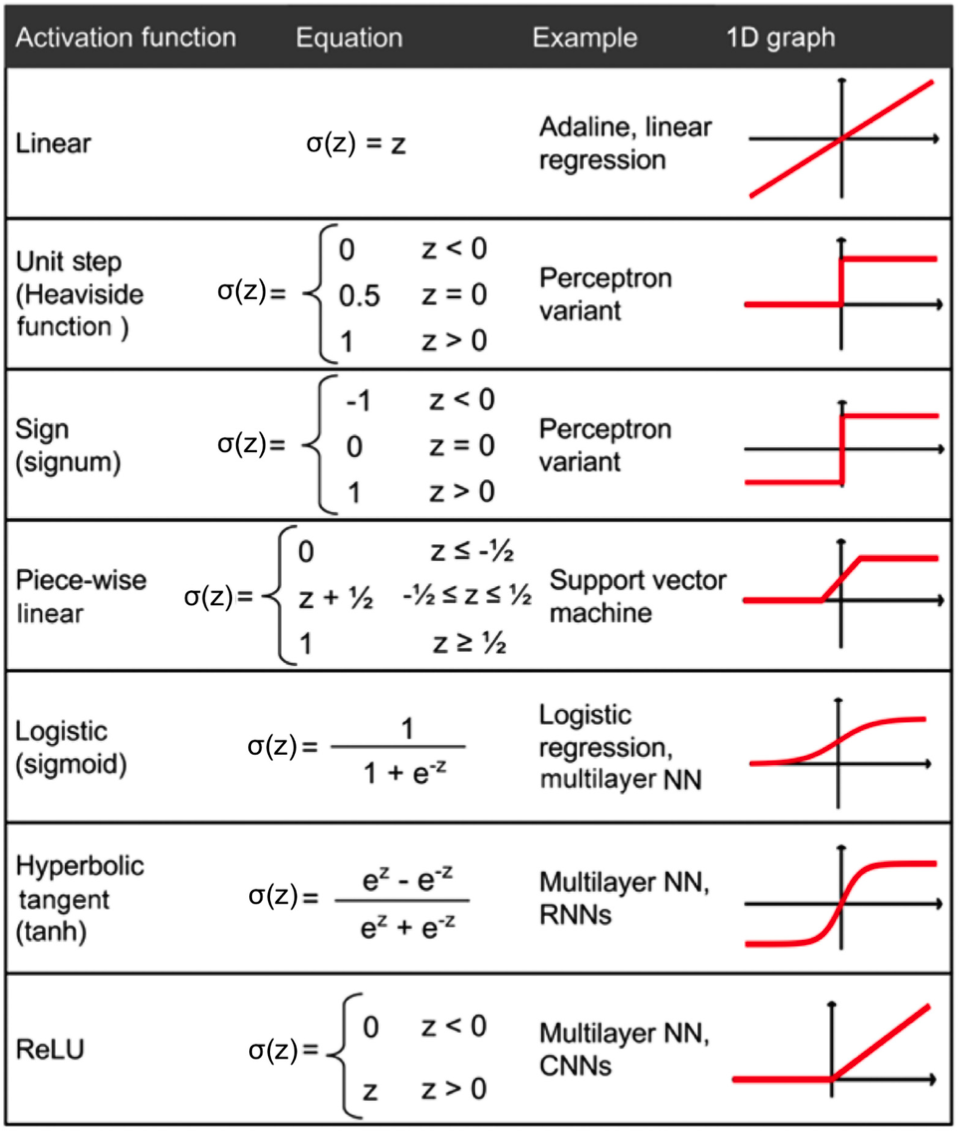

In [41]:
IPythonImage(filename='figures/12_11.png', width=500)

## Summary

---

Readers may ignore the next cell.

In [42]:
! python ../.convert_notebook_to_script.py --input ch12_part2.ipynb --output ch12_part2.py

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbconvert` not found.
